<a href="https://colab.research.google.com/github/kommalina/Occupancy_Detection-/blob/main/notebooks/Occupancy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
occup_df = pd.read_csv('/content/sample_data/datatraining.txt', sep = ',')
occup_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [3]:
col_slice = ['date']
sliced_col = occup_df[col_slice].apply(lambda x : x.str[11:19])
occup_df[col_slice] = sliced_col
occup_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [4]:
occup_df.dtypes

,0
date,object
Temperature,float64
Humidity,float64
Light,float64
CO2,float64
HumidityRatio,float64
Occupancy,int64


In [5]:
occup_df.isna().sum()

,0
date,0
Temperature,0
Humidity,0
Light,0
CO2,0
HumidityRatio,0
Occupancy,0


In [6]:
encoder = LabelEncoder()
occup_df['date'] = encoder.fit_transform(occup_df['date'])

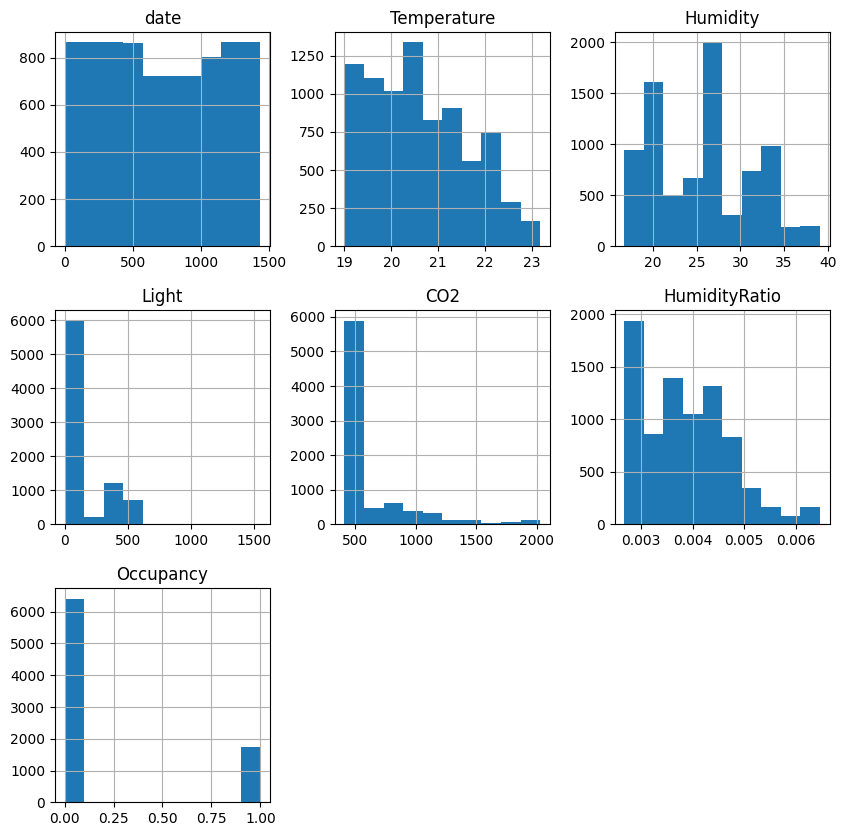

In [7]:
plt.rcParams["figure.figsize"] = (10, 10)
occup_df.hist()
plt.show()

In [8]:
#Признаки
X = occup_df[['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
#Классы
y = occup_df['Occupancy']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Масштабирование обучающих данных признаков:

---



In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_train_norm

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.018068,0.143541,0.571493,0.000000,0.018103,0.392419
1,0.414871,0.087321,0.618520,0.016532,0.008819,0.415045
2,0.160528,0.093301,0.640914,0.000000,0.015318,0.435229
3,0.441974,0.679426,0.064159,0.225590,0.031100,0.070836
4,0.643502,0.741627,0.214310,0.344584,0.291815,0.228822
...,...,...,...,...,...,...
5450,0.168172,0.093301,0.645392,0.000000,0.012533,0.438916
5451,0.010424,0.239234,0.087560,0.000000,0.013771,0.007543
5452,0.892286,0.452153,0.143769,0.000000,0.035226,0.098422
5453,0.554552,0.547847,0.130333,0.303082,0.153025,0.106078


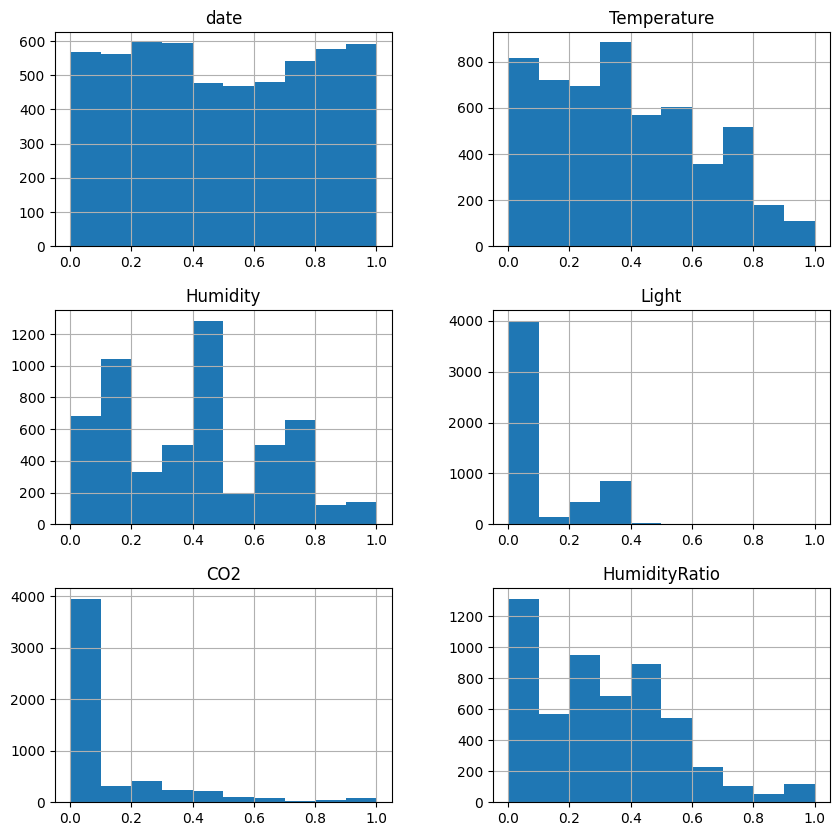

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
X_train_norm.hist()
plt.show()

Масштабирование тестовых данных признаков:

In [12]:
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_norm

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.563586,0.584928,0.121375,0.340279,0.156119,0.105506
1,0.385685,0.444179,0.819916,0.298261,0.156326,0.705946
2,0.005559,0.287081,0.201545,0.000000,0.020785,0.114654
3,0.407227,0.358852,0.643041,0.307904,0.338542,0.518790
4,0.771369,0.861244,0.476393,0.000000,0.151787,0.520419
...,...,...,...,...,...,...
2683,0.753996,0.645933,0.183630,0.298261,0.225437,0.177177
2684,0.143155,0.465311,0.358303,0.000000,0.019960,0.295011
2685,0.051425,0.239234,0.085545,0.000000,0.016246,0.005829
2686,0.747047,0.980861,0.466241,0.293439,0.180566,0.547851


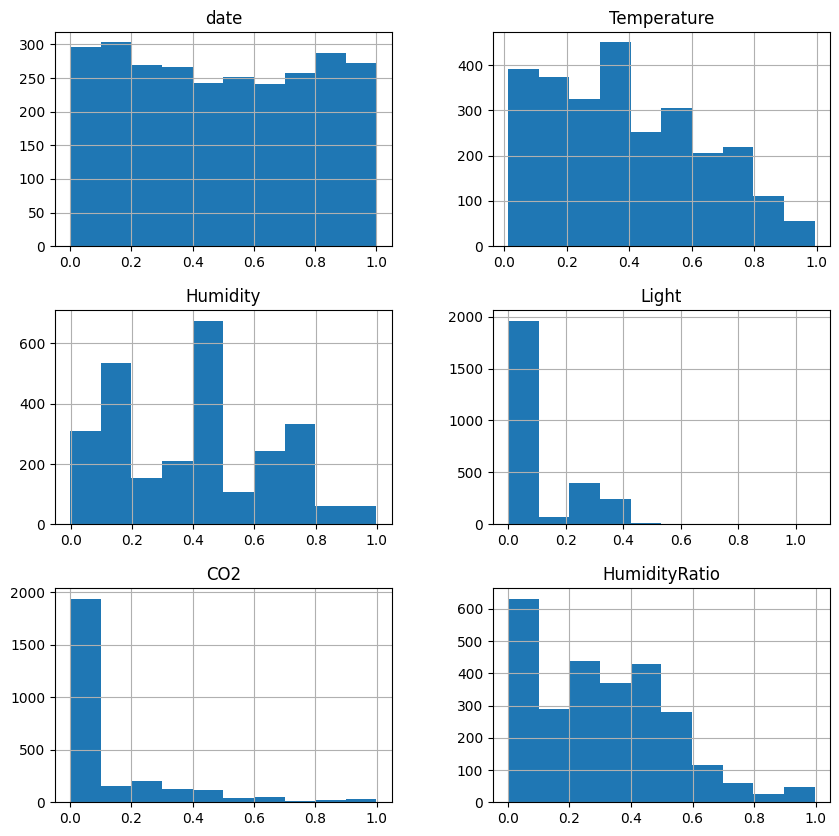

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
X_test_norm.hist()
plt.show()

In [14]:
y_train

,Occupancy
4716,0
5287,0
4921,0
3886,0
2736,1
...,...
4932,0
3265,0
1654,0
2608,1


In [15]:
y_test

,Occupancy
2621,1
8125,1
1818,0
6716,1
40,0
...,...
2895,1
576,0
3324,0
5,1


In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

Обучение модели:

In [17]:
clf = SGDClassifier(loss = 'log_loss', penalty = 'l2', max_iter = 1000)
clf.fit(X_train_norm, y_train)

SGDClassifier(loss='log_loss')

In [18]:
y_pred = clf.predict(X_test_norm)

In [19]:
accuracy_train = clf.score(X_train_norm, y_train)
accuracy_train

0.9871677360219981

In [20]:
accuracy_test = clf.score(X_test_norm, y_test)
accuracy_test

0.9854910714285714

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[2076,   30],
       [   9,  573]])

In [23]:
y_pred_prob = clf.predict_proba(X_test_norm)
y_pred_prob

array([[0.11039614, 0.88960386],
       [0.24860395, 0.75139605],
       [0.9910818 , 0.0089182 ],
       ...,
       [0.98991018, 0.01008982],
       [0.50796528, 0.49203472],
       [0.99225953, 0.00774047]])

In [24]:
y_pred1 = y_pred_prob[:,1]

In [25]:
from sklearn.metrics import precision_recall_curve

In [26]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred1, pos_label=1)
precision, recall, threshold

(array([0.21651786, 0.21659844, 0.21667908, ..., 0.5       , 0.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00171821, 0.        ,
        0.        ]),
 array([0.00194122, 0.00194323, 0.00200833, ..., 0.99864929, 0.99892422,
        0.99999991]))

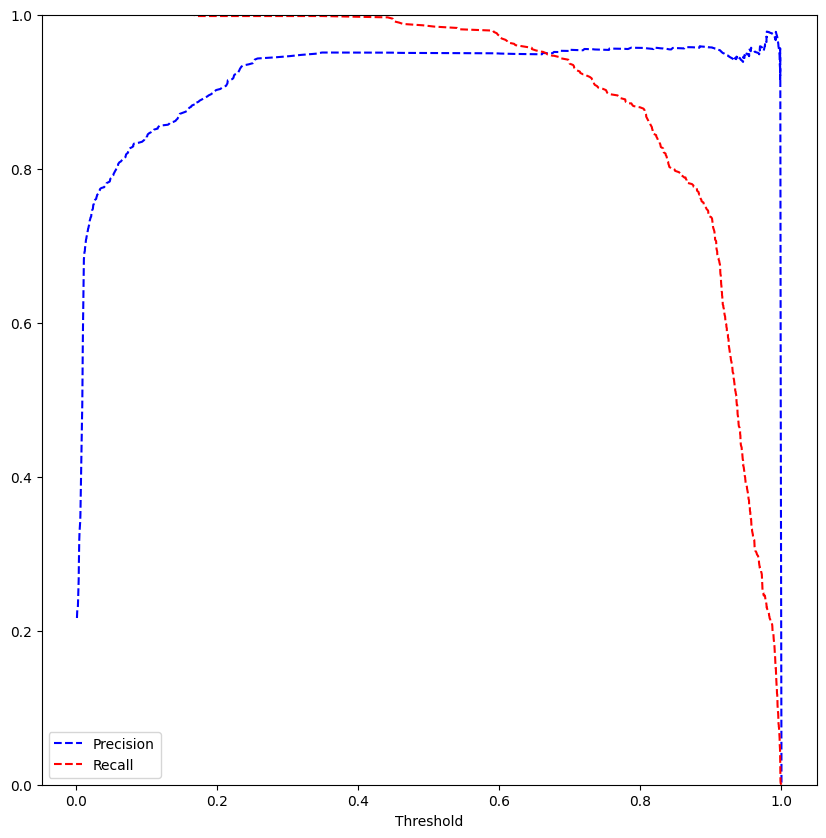

In [27]:
plt.figure()
plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "r--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])
plt.savefig("PR_thr_curve.png")

In [28]:
thr_inter = 0.001
for i, p in enumerate(precision):
    if np.abs(p - recall[i]) < thr_inter:
        print(threshold[i])

0.6663859390764856
0.999999909210028


In [29]:
from sklearn.metrics import precision_recall_curve

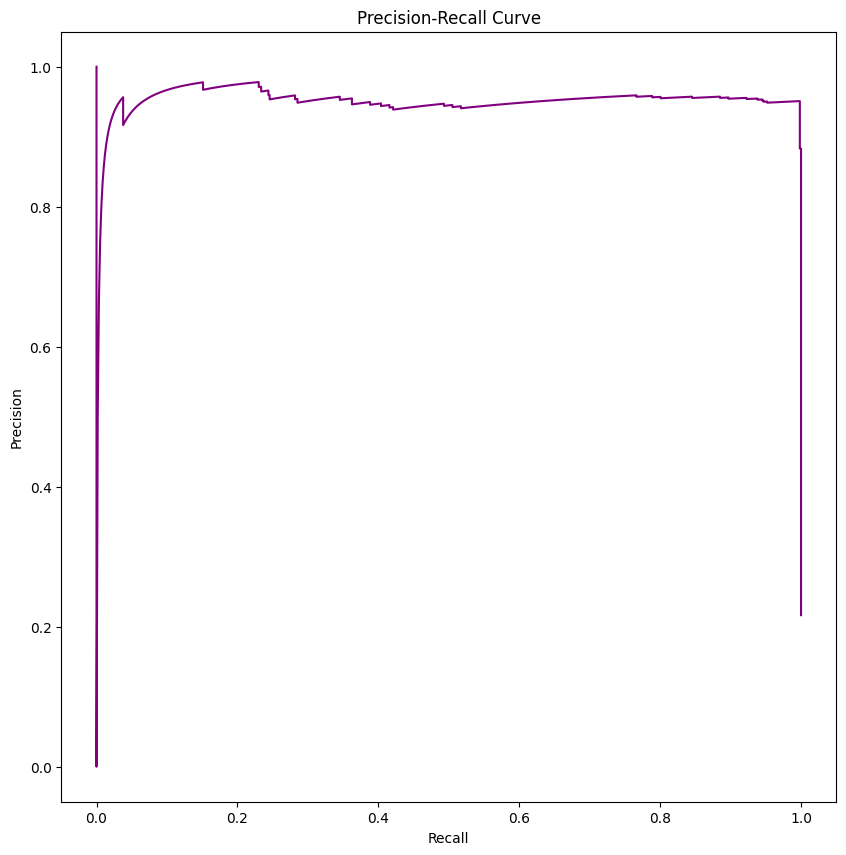

<Figure size 500x500 with 0 Axes>

In [30]:
fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [31]:
from sklearn import metrics

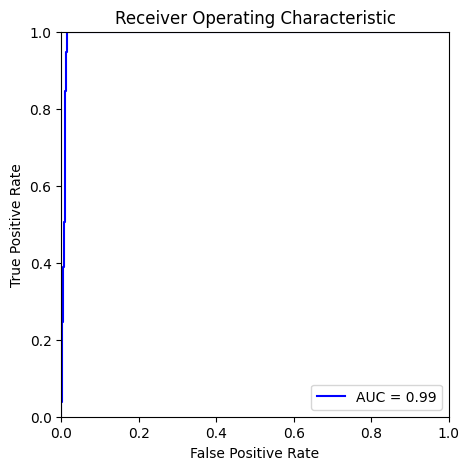

In [32]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.figure(figsize =(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [35]:
y_pred = (y_pred1 > 0.66).astype(int).ravel()
cm = confusion_matrix(y_test, y_pred)
cm

array([[2076,   30],
       [  28,  554]])